### MNIST Classifier CNN

The objective of this notebook is classify the images of the dataset MNIST via using a Convolutional Neural Network

In [81]:
# basic data manipulation and visualization
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

# torch packages
import torch
from torch import nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader

In [3]:
torch.manual_seed(4)

### Build dataset

Create and build the MNIST dataset, where we are gonna to transforms the images resizing them to 16x16 pixels

In [19]:
IMAGE_SIZE = 16
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
test_dataset = dsets.MNIST(root="./data", train=False, download=True, transform=composed)

Text(0.5, 1.0, 'Number = 5')

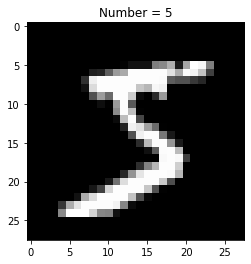

In [59]:
plt.imshow(train_dataset.data[0], cmap=plt.cm.gray)
plt.title("Number = " + str(train_dataset.targets[0].item()))

## First Assigment:

Take a screen shot of  the first three images of the validation dataset  from the code provided . The function show_data

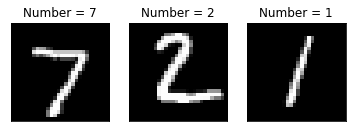

In [165]:
fig, axes = plt.subplots(1,3)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_dataset.data[i], cmap=plt.cm.gray)
    ax.set_title("Number = " + str(test_dataset.targets[i].item()))
    ax.set_xticks([])
    ax.set_yticks([])

In [169]:
def show_data(dataset):
    plt.imshow(dataset.data[i], cmap=plt.cm.gray)
    plt.set_title("Number = " + str(dataset.targets[i].item()))
    plt.set_xticks([])
    plt.set_yticks([])

### Build CNN

In [65]:
class CNN(nn.Module):
    
    # constructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN,self).__init__()
        self.cnn1=nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # prediction
    def forward(self, x):
        x=self.cnn1(x)
        x=torch.relu(x)
        x=self.maxpool1(x)
        x=self.cnn2(x)
        x=torch.relu(x)
        x=self.maxpool2(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

In [83]:
cnn = CNN()
cnn1_weights = cnn.state_dict()["cnn1.weight"]
cnn2_weights = cnn.state_dict()["cnn2.weight"]

In [94]:
print("In the first convolutional layer, there are {} kernels, with a size of {}".format(cnn1_weights.shape[0], cnn1_weights.shape[3]))
print("In the second convolutional layer, there are {} kernels, with a size of {}".format(cnn2_weights.shape[0], cnn2_weights.shape[3]))

In the first convolutional layer, there are 16 kernels, with a size of 5
In the second convolutional layer, there are 32 kernels, with a size of 5


In [132]:
def plot_parameters(W, number_rows=1, name="", i=0):
    W = W.data[:, i, :, :]
    n_filters = W.shape[0]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(number_rows, n_filters // number_rows)
    fig.subplots_adjust(hspace=0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_filters:
            # Set the label for the sub-plot.
            ax.set_xlabel("kernel:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(W[i, :], vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.suptitle(name, fontsize=10)    
    plt.show()

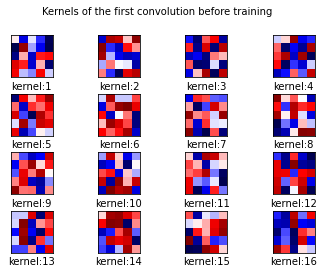

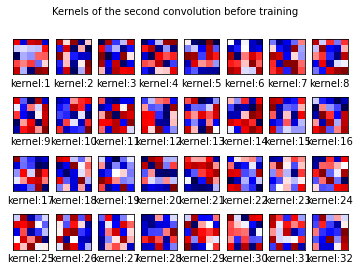

In [137]:
plot_parameters(cnn1_weights, number_rows=4, name="Kernels of the first convolution before training")
plot_parameters(cnn2_weights, number_rows=4, name="Kernels of the second convolution before training")

In [141]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(cnn.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=5000)

In [157]:
# Train the model

n_epochs=8
cost_list=[]
accuracy_list=[]
N_test=len(test_dataset)
COST=0

def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = cnn(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        cost_list.append(COST)
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            z = cnn(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
train_model(n_epochs)

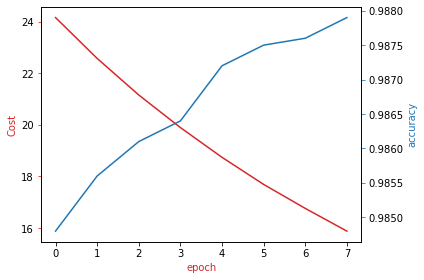

In [158]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [173]:
count = 0
for x, y in torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1):
    z = cnn(x)
    _, yhat = torch.max(z, 1)
    print(yhat == y)

tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([Tr